In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlt
import random
plt.rcParams['font.sans-serif']=['simhei'] #显示中文
plt.rcParams['axes.unicode_minus']=False   #用来正常显示负号

# 基本的最小二乘法

ws=$(X^T\cdot X)^{-1}\cdot X^T\cdot Y$

In [2]:
date=pd.read_table("E:\\ML\\王彦博\\第1章 线性回归\\ex0.txt",header=None)

In [3]:
date.head()

,0,1,2
0,1.0,0.067732,3.176513
1,1.0,0.427810,3.816464
2,1.0,0.995731,4.550095
3,1.0,0.738336,4.256571
4,1.0,0.981083,4.560815


In [4]:
date.describe()

,0,1,2
count,200.0,200.000000,200.000000
mean,1.0,0.488319,3.835601
std,0.0,0.292943,0.503443
min,1.0,0.014855,3.078132
25%,1.0,0.234368,3.452775
50%,1.0,0.466573,3.839350
75%,1.0,0.730712,4.247613
max,1.0,0.995731,4.692514


In [5]:
def get_matrix(dateSet):
    matx=np.mat(dateSet.iloc[:,:-1].values)
    maty=np.mat(dateSet.iloc[:,-1].values)
    return matx,maty

In [6]:
da=get_matrix(date)
da[0].shape
da[1].shape

(1, 200)

np.mat()可以转为np.matrix，相比于np.array做向量乘法更加方便

In [7]:
dateMat=get_matrix(date)
dateX=dateMat[0]
dateY=dateMat[1]

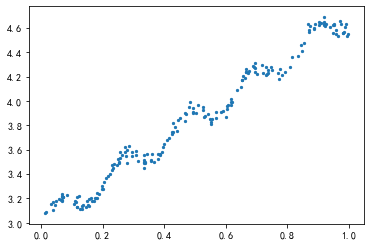

In [8]:
plt.scatter(dateX.A[:,1],dateY.A,s=5)

np.matrix不能直接画图，需要转化为array才能继续画图

In [9]:
def standRegres(dataSet):
    dataMat=get_matrix(dataSet)
    dataX=dataMat[0]#自变量
    dataY=dataMat[1]#因变量
    tem=dataX.T*dataX
    if np.linalg.det(tem)==0:
        return #如果说行列式为0的话那么就说是奇异矩阵
    res=tem.I*dataX.T*dataY.T
    return res 

np.matrix求逆矩阵A.I就可以了

In [10]:
ws=standRegres(date)

In [11]:
ws

matrix([[3.00774324],
        [1.69532264]])

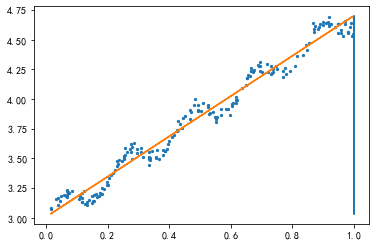

In [12]:
plt.scatter(dateX.A[:,1],dateY.A,s=5)
y=dateX*ws
plt.plot(dateX,y)

# 加权重的最小二乘法 

ws=$(X^T\cdot Weight\cdot X)^{-1}\cdot X^T\cdot Weight \cdot Y$

In [13]:
def WLR(xtest,xmat,ymat,k):
    n=xmat.shape[0]
    m=xtest.shape[0]
    weight=np.mat(np.zeros((n,n)))
    ytest=np.zeros(m)
    for i in range(m):#对于不同的测试值求得不同的权重，权重通过高斯核来求得
        for j in range(n):
            tem=xtest[i]-xmat[j]
            weight[j,j]=np.exp(tem*tem.T/(-2*(k**2)))
        xw=xmat.T*weight*xmat
        if np.linalg.det(xw)==0:
            print('矩阵为奇异矩阵')
            return
        ws=xw.I*xmat.T*weight*ymat.T
        ytest[i]=xtest[i,:]*ws
    return ws,ytest   

In [14]:
def data_split(date):
    ind=np.argsort(date.iloc[:,1])
    newData=date.iloc[ind,:]
    x,y=get_matrix(newData)
    return x,y,ind

In [15]:
xMat,yMat,ind=data_split(date)

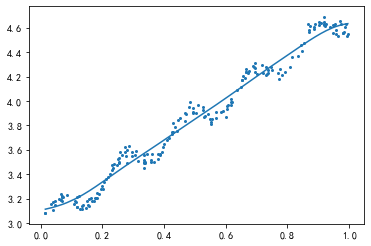

In [16]:
res=WLR(xMat,xMat,yMat,0.1)
plt.scatter(xMat.A[:,1],yMat.A,s=4)
plt.plot(xMat.A[:,1],res[1])

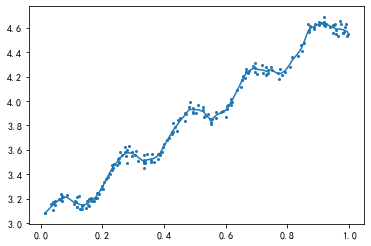

In [17]:
res=WLR(xMat,xMat,yMat,0.01)
plt.scatter(xMat.A[:,1],yMat.A,s=4)
plt.plot(xMat.A[:,1],res[1])

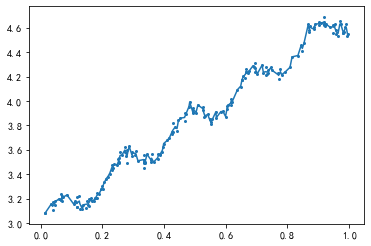

In [18]:
res=WLR(xMat,xMat,yMat,0.003)
plt.scatter(xMat.A[:,1],yMat.A,s=4)
plt.plot(xMat.A[:,1],res[1])

## k的取值对泛化能力的影响 

In [19]:
abalone=pd.read_table('E:\\ML\\王彦博\\第1章 线性回归\\abalone.txt',header=None)
abalone.columns=['性别','长度','直径','高度','整体重量','肉重量','内脏重量','壳重','年龄']

In [20]:
abalone.head()

,性别,长度,直径,高度,整体重量,肉重量,内脏重量,壳重,年龄
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [21]:
aba=abalone.loc[abalone.iloc[:,1]>0.4,:]

In [22]:
print(abalone.shape)
print(aba.shape)

(4177, 9)
(3482, 9)


In [23]:
def splitData(data,rate):
    l=list(data.index)
    le=data.shape[0]
    np.random.shuffle(l)
    data.index=l
    sp=int(le*rate)
    train=data.iloc[range(sp),:]
    test=data.iloc[range(sp,le),:]
    train.index=range(train.shape[0])
    test.index=range(test.shape[0])
    return train,test

In [24]:
train,test=splitData(aba,0.8)

In [25]:
def ssePlot(data,rate):
    train,text=splitData(data,rate)
    testX,testY=get_matrix(test)
    trainX,trainY=get_matrix(train)
    sseTrain=[]
    sseTest=[]
    for k in np.arange(0.2,10,0.5):
        wstr,trainHat=WLR(trainX,trainX,trainY,k)
        ssetr=((trainHat-trainY.A.T)**2).sum()
        sseTrain.append(ssetr)
        
        wste,testHat=WLR(testX,trainX,trainY,k)
        ssete=((testHat-testY.A.T)**2).sum()
        sseTest.append(ssete)
    plt.plot(np.arange(0,10,0.5),sseTrain,color='b',)
    plt.plot(np.arange(0,10,0.5),sseTest,color='r')
    plt.title("采用不同K值的高斯核函数的加权最小二乘法中K值对泛化能力的影响")
    plt.xlabel("K值")
    plt.ylabel("损失函数（二范数）")
    plt.legend(["训练集","测试集"])

In [26]:
#ssePlot(aba,0.8)

# 岭回归 

岭回归：在损失函数上加上一个二范数是的结果$ws=(X^T\cdot X)^{-1}\cdot X^T\cdot Y\\$变为$ws=(X^T\cdot X+\lambda\cdot X)^{-1}\cdot X^T\cdot Y$结果可逆

损失函数L=$\sum^{n}_{i=1}(x_i\cdot ws-y_i)^2+\lambda\cdot \sum_{i=1}^p ws^2$

In [27]:
def ridgeRegres(data,k=30):
    xmat,ymat=get_matrix(data)
    n,m=xmat.shape
    resMat=np.zeros((k,m))
    xvar=xmat.var(0)
    xmean=xmat.mean(0)
    ymean=ymat.mean()
    xmat=(xmat-xmean)/xvar
    ymat=ymat-ymean
    for i in range(k):
        lam = np.exp(i-10)
        xTx=xmat.T*xmat+np.eye(m)*lam
        resMat[i,:]=(xTx.I*(xmat.T*ymat.T)).T
    return resMat

In [28]:
def ridgeTest(dataSet,k=30):
    xMat,yMat=get_Mat(dataSet)
    m,n=xMat.shape
    wMat = np.zeros((k,n))
    #特征标准化
    yMean = yMat.mean(0)
    xMeans = xMat.mean(0)
    xVar = xMat.var(0)
    yMat = yMat-yMean
    xMat = (xMat-xMeans)/xVar
    for i in range(k):
        xTx = xMat.T*xMat
        lam = np.exp(i-10)
        denom = xTx+np.eye(n)*lam
        ws=denom.I*(xMat.T*yMat)
        wMat[i,:]=ws.T
    return wMat

In [29]:
res=ridgeRegres(aba)

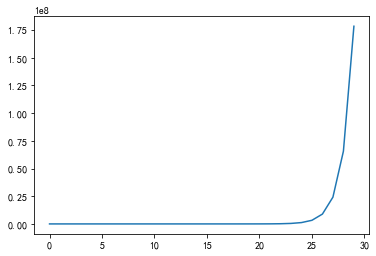

In [30]:
x=np.arange(0,30,1)
y=np.exp(x-10)
plt.plot(x,y)

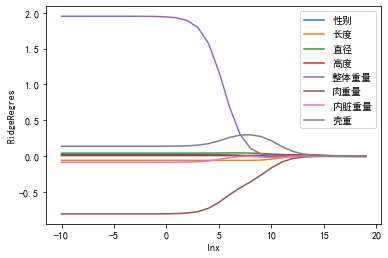

In [31]:
plt.plot(np.arange(-10,20),res)
plt.xlabel("lnx")
plt.ylabel("RidgeRegres")
plt.legend(['性别','长度','直径','高度','整体重量','肉重量','内脏重量','壳重','年龄'])

In [32]:
res[-1]

array([-2.06666884e-06,  2.38234463e-04,  3.13537351e-04,  6.26350005e-04,
        5.04116828e-05,  6.22652332e-05,  1.93942951e-04,  2.37815163e-04])

# lasso回归 

在使用普通最小二乘法回归的时候当两个变量具有相关性的时候，可能会使得其中一个系数是个很大正数，另一个系数是很大的负数。LASSO(The Least Absolute Shrinkage and Selection Operator)构造一个一阶惩罚函数获得一个精炼的模型, 通过最终确定一些变量的系数为0进行特征筛选。

损失函数L=$\sum^{n}_{i=1}(x_i\cdot ws-y_i)^2+\lambda\cdot \sum_{i=1}^p ws$

因为有绝对值我们不能够进行求导，所以我们就要采用迭代的方法求解

In [33]:
def cost(xMat,yMat,ws):               #损失函数
    yHat=xMat*ws
    return ((yHat-yMat)**2).sum()

In [34]:
def regular(xMat,yMat):               #数据正则化
    xMean=xMat.mean(0)
    yMean=yMat.mean()
    xVar=xMat.var(0)
    xMat=(xMat-xMean)/xVar
    yMat=yMat-yMean
    return xMat,yMat

In [46]:
def lassoRegres(data,step,freq):
    xMat,yMat=get_matrix(data)
    m,n=xMat.shape
    xMat,yMat=regular(xMat,yMat)
    errMax=0
    lassoMat=np.zeros((freq,n))       #lassoMat是每一次迭代之后的最优lasso参数
    lassoTest=np.zeros((n,1))          #每一迭代的存放lasso的地方
    lassoMax=np.zeros_like(lassoTest)  #每一次迭代的时候最优的lasso
    for i in range(freq):              #总共迭代freq步
        errMax=np.inf
        for j in range(n):             #每次迭代分别对每个变量进行迭代
            for k in [-1,1]:           #判断是加上还是减去
                lassoTest=lassoMax.copy()
                lassoTest[j]+=step*k
                costTest=cost(xMat,yMat,lassoTest)
                if costTest < errMax:
                    lassoMax=lassoTest
                    errMax=costTest
        lassoMat[i,:]=lassoMax.T
    return lassoMat

In [47]:
res=lassoRegres(aba,0.01,200)

In [43]:
res

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

自己写的lasso回归不如掉包，时间差距太大了